In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the dataset**

In [3]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.shape

(400, 5)

In [8]:
X= df.iloc[:,[2,3]].values
Y = df.iloc[:,4].values

**Splitting the dataset into the Training set and Test set**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Fitting K-NN to the Training set**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric= "minkowski", p=2)
knn.fit(x_train, y_train)


KNeighborsClassifier()

**Predicting the Test set results**

In [12]:
y_pred = knn.predict(x_test)

**Making the Confusion Matrix**

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

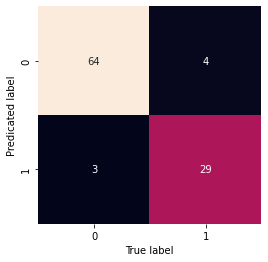

In [14]:
def plot_conf_mat(y_test, y_pred):
  fig , ax = plt.subplots(figsize=(4,4))
  ax = sns.heatmap(cm,
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicated label")

plot_conf_mat(y_test, y_pred)

In [15]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))

Accuracy Score : 0.93


In [16]:
print("Classification Report :\n", classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

